In [1]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Functions

In [114]:
def import_season_roster(year):
    season_data = nfl.import_seasonal_data([year],'ALL')
    roster_data = nfl.import_seasonal_rosters([year])
    season_roster_merge = season_data.merge(roster_data, on=['player_id','season'],how='left')
    season_roster_merge['fantasy_points_pg'] = (season_roster_merge['fantasy_points']/17).round(2)

    return season_roster_merge



def clean_position(file,position):
    file_regular_season = file[(file['season_type']=='REG') & (file['position']==position)]
    file_active = file_regular_season[file_regular_season ['status']=='ACT'] 
    file_filter = file_active[[
        'player_id','player_name','years_exp','games','sacks','sack_yards','passing_epa','sack_fumbles','sack_fumbles_lost',
        'pacr','racr','wopr_x','passing_yards_after_catch','rushing_fumbles','dakota','receiving_yards_after_catch','passing_first_downs',
        'rushing_first_downs','rushing_epa','targets','receiving_air_yards','receiving_first_downs',
        'receiving_epa','receiving_2pt_conversions','racr','target_share','air_yards_share','tgt_sh','ay_sh', 'yac_sh', 
        'wopr_y', 'ry_sh', 'rtd_sh','rfd_sh', 'rtdfd_sh', 'dom', 'w8dom', 'yptmpa', 'ppr_sh','age','height','weight',
                             #Fantasy Point Factors
                            'passing_yards',
                            'passing_tds',
                            'interceptions',
                            'rushing_yards',
                            'rushing_tds',
                            'receptions',
                            'receiving_yards', 
                            'receiving_tds',
                            'rushing_2pt_conversions',
                            'passing_2pt_conversions',
                            'carries',
                            'rushing_fumbles_lost',
                            'fantasy_points','fantasy_points_ppr','fantasy_points_pg']]
    return file_filter


fantasy_point_columns = ['passing_yards', 'passing_tds', 'interceptions','passing_yards_after_catch',
                         'passing_2pt_conversions','rushing_yards','rushing_tds','rushing_2pt_conversions',
                         'receptions','receiving_yards','receiving_tds','receiving_2pt_conversions',
                         'rushing_fumbles_lost','receiving_fumbles_lost','fantasy_points','carries','rushing_fumbles']

### Loading Data

#### Play by Play data

In [4]:
pbp = nfl.import_pbp_data([2024]) #2024 play by play data
pbp

2024 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,None,None,None,...,0.0,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,0.257819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,-0.200602,NaN,NaN,NaN,NaN,NaN,0.456761,-45.676102
3,83.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,2.028874,1.345418,9.321221,8.0,0.509778,0.363807,0.576656,42.334431
4,108.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,0.754242,0.882798,5.783560,4.0,0.668478,0.255140,0.426443,57.355690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49487,4158.0,2024_22_KC_PHI,2025020900,PHI,KC,POST,22,PHI,home,KC,...,0.0,1.0,1.102179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49488,4181.0,2024_22_KC_PHI,2025020900,PHI,KC,POST,22,PHI,home,KC,...,0.0,1.0,-0.599592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49489,4203.0,2024_22_KC_PHI,2025020900,PHI,KC,POST,22,PHI,home,KC,...,0.0,1.0,-0.431691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49490,4225.0,2024_22_KC_PHI,2025020900,PHI,KC,POST,22,PHI,home,KC,...,0.0,1.0,-0.897924,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
pbp.describe()

,play_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
count,49492.000000,49492.000000,45950.000000,49487.000000,49487.000000,49487.000000,49492.000000,48929.000000,49492.000000,49492.000000,...,49492.000000,49492.000000,48922.000000,16511.000000,16511.000000,16511.000000,16511.000000,16511.000000,37672.000000,36570.000000
mean,2194.845947,9.964701,47.231426,409.086182,803.135132,1700.861938,0.017599,11.296103,0.076113,2.569890,...,0.084943,0.507819,0.018444,0.730059,5.542846,3.724971,0.773309,0.574204,0.628901,-1.752239
std,1278.896851,5.584036,23.769136,283.124695,561.684387,1056.347778,0.131475,6.554400,0.265197,1.126108,...,0.278875,0.499893,1.250819,0.516498,2.544186,2.612766,0.254200,0.357716,0.241009,42.327763
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,-12.689102,-1.555835,0.497469,0.000000,0.026981,0.004220,0.017579,-99.435692
25%,1094.000000,5.000000,30.000000,143.000000,271.000000,781.000000,0.000000,6.000000,0.000000,2.000000,...,0.000000,0.000000,-0.552899,0.327920,3.784112,2.000000,0.551024,0.241776,0.455769,-42.689049
50%,2171.000000,10.000000,48.000000,389.000000,782.000000,1800.000000,0.000000,11.000000,0.000000,3.000000,...,0.000000,1.000000,-0.000000,0.605034,4.650056,3.000000,0.981908,0.465574,0.604551,3.782982
75%,3278.000000,15.000000,67.000000,654.000000,1286.000000,2578.000000,0.000000,17.000000,0.000000,4.000000,...,0.000000,1.000000,0.534317,1.008609,6.934323,5.000000,1.000000,0.999322,0.858460,32.116222
max,5246.000000,22.000000,99.000000,900.000000,1800.000000,3600.000000,1.000000,31.000000,1.000000,5.000000,...,1.000000,1.000000,8.541231,9.585749,23.952005,36.000000,1.000000,1.000000,0.997794,97.784882


#### Importing Season Data

In [115]:
Season_2024 = import_season_roster(2024)

In [116]:
Season_2024.columns

Index(['player_id', 'season', 'season_type', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr_x', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr',
       'games', 'tgt_sh', 'ay_sh', 'yac_sh', 'wopr_y', 'ry_sh', 'rtd_sh',
       'rfd_sh', 'rtdfd_sh', 'dom', '

In [117]:
#creates individual dataframes for each position
positions = list(Season_2024['position'].unique())
d = {name: pd.DataFrame() for name in positions}
for f in positions:
    d[f] = clean_position(Season_2024,f)

In [83]:
#separating out by position
d['QB'].isnull().sum().sort_values(ascending=False) #checks for null values
d['WR'].isnull().sum().sort_values(ascending=False) #checks for null values
d['TE'].isnull().sum().sort_values(ascending=False) #checks for null values
d['RB'].isnull().sum().sort_values(ascending=False) #checks for null values
d['P'].isnull().sum().sort_values(ascending=False) #checks for null values

rtd_sh                         2
dom                            2
w8dom                          2
player_id                      0
yac_sh                         0
ry_sh                          0
rfd_sh                         0
rtdfd_sh                       0
yptmpa                         0
ppr_sh                         0
age                            0
height                         0
weight                         0
passing_yards                  0
passing_tds                    0
interceptions                  0
rushing_yards                  0
rushing_tds                    0
receptions                     0
receiving_yards                0
receiving_tds                  0
rushing_2pt_conversions        0
passing_2pt_conversions        0
carries                        0
rushing_fumbles_lost           0
fantasy_points                 0
fantasy_points_ppr             0
wopr_y                         0
ay_sh                          0
player_name                    0
tgt_sh    

#### Column descriptions:
- _pacr_: passing air conversion ratio (pacr) pass efficency metric that measures the rate at which air yards are converted to passing yards. PACR = (passing yards)/(air yards)
- _racr_: receiver air conversion ratio (racr) receiver efficiency metric that measures the rate at which targeted air yards are converted to receiving yards. RACR = (receiving yards)/(air yards)
- _wopr_: overall receiving metric meant to include both market share of targets and market share of air yards. WOPR = 1.5*(Market share of target) + 0.7*(Market share of air yards)

In [73]:
Season_2024.describe()

,season,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,...,ppr_sh,jersey_number,height,weight,years_exp,week,entry_year,rookie_year,draft_number,age
count,758.0,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,...,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,576.000000,758.000000
mean,2024.0,16.010554,24.511873,175.525066,1.114776,0.534301,1.836412,12.105541,0.244063,0.102902,...,0.081120,36.335092,73.295515,216.856201,3.755937,19.096306,2020.244063,2020.249340,93.223958,26.075198
std,0.0,63.530268,95.799434,701.426805,4.852244,2.150423,7.330445,48.738696,0.975153,0.476632,...,0.064642,32.017022,2.880216,26.733810,3.185554,1.462869,3.185554,3.185974,67.699157,3.135157
min,2024.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.029136,0.000000,66.000000,153.000000,0.000000,3.000000,2005.000000,2005.000000,1.000000,20.000000
25%,2024.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030352,11.000000,71.000000,200.000000,1.000000,18.000000,2018.000000,2018.000000,35.000000,24.000000
50%,2024.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.061756,22.000000,73.000000,215.000000,3.000000,19.000000,2021.000000,2021.000000,82.000000,25.000000
75%,2024.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.126088,81.000000,76.000000,232.000000,6.000000,20.000000,2023.000000,2023.000000,139.000000,28.000000
max,2024.0,460.000000,652.000000,4918.000000,43.000000,16.000000,68.000000,466.000000,9.000000,5.000000,...,0.266902,94.000000,81.000000,360.000000,19.000000,22.000000,2024.000000,2024.000000,262.000000,40.000000


<Axes: >

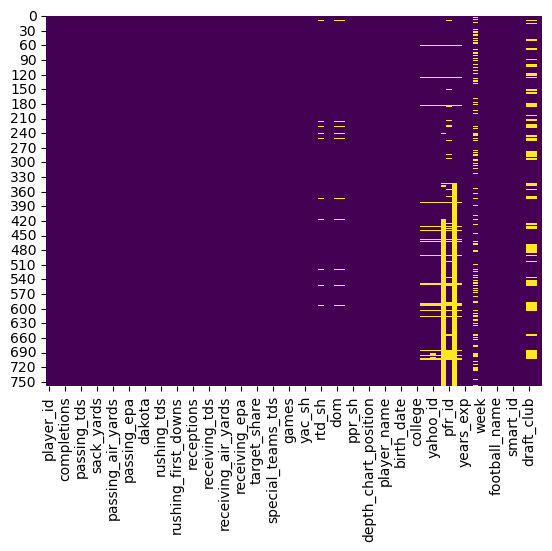

In [74]:
Season_2024.isnull().sum()
sns.heatmap(Season_2024.isnull(),cbar=False, cmap='viridis')

#### Investigating top performers

In [118]:
Season_2024.sort_values(by='completions',ascending=False).head()[['player_name','completions']]
Season_2024.sort_values(by='passing_air_yards',ascending=False).head()[['player_name','completions']]
Season_2024.sort_values(by='passing_yards_after_catch',ascending=False).head()[['player_name','completions']]
Season_2024.sort_values(by='pacr',ascending=False).head()[['player_name','completions','pacr','fantasy_points','fantasy_points_pg']]


,player_name,completions,pacr,fantasy_points,fantasy_points_pg
84,Jared Goff,390,26.314073,323.46,19.03
26,Geno Smith,407,21.209822,266.00,15.65
195,Lamar Jackson,316,20.775620,430.38,25.32
206,Baker Mayfield,407,20.530268,365.80,21.52
232,Kyler Murray,372,19.215985,297.24,17.48


In [126]:
for key, df, in d.items():
    non_zero_values_pg = df['fantasy_points_pg'][df['fantasy_points_pg'] !=0] #removes the players who had zero to get a better idea of the top performers
    avg_fantasy_points_pg = non_zero_values_pg.mean()
    df['avg_fantasy_points_by_position_pg'] = avg_fantasy_points_pg
    df['above_avg_pg'] = df['fantasy_points_pg'] >= avg_fantasy_points_pg

    non_zero_values_tot = df['fantasy_points'][df['fantasy_points'] !=0]
    avg_fantasy_points_tot = non_zero_values_tot.mean()
    df['avg_fantasy_points_by_position_tot'] = avg_fantasy_points_tot
    df['above_avg_tot'] = df['fantasy_points'] >= avg_fantasy_points_tot


In [135]:
Top10_QBs = d['QB'].sort_values(by='fantasy_points',ascending=False)[['player_name','fantasy_points','fantasy_points_pg','avg_fantasy_points_by_position_tot','avg_fantasy_points_by_position_pg','above_avg_pg','above_avg_tot']].head(10)
Top10_QBs

,player_name,fantasy_points,fantasy_points_pg,avg_fantasy_points_by_position_tot,avg_fantasy_points_by_position_pg,above_avg_pg,above_avg_tot
195,Lamar Jackson,430.38,25.32,122.967742,7.233387,True,True
341,Joe Burrow,372.82,21.93,122.967742,7.233387,True,True
208,Josh Allen,372.34,21.90,122.967742,7.233387,True,True
206,Baker Mayfield,365.80,21.52,122.967742,7.233387,True,True
747,Jayden Daniels,355.82,20.93,122.967742,7.233387,True,True
84,Jared Goff,323.46,19.03,122.967742,7.233387,True,True
706,Bo Nix,316.20,18.60,122.967742,7.233387,True,True
328,Jalen Hurts,315.12,18.54,122.967742,7.233387,True,True
211,Sam Darnold,307.96,18.12,122.967742,7.233387,True,True
232,Kyler Murray,297.24,17.48,122.967742,7.233387,True,True


In [134]:
Top10_WRs = d['WR'].sort_values(by='fantasy_points',ascending=False)[['player_name','fantasy_points','fantasy_points_pg','avg_fantasy_points_by_position_tot','avg_fantasy_points_by_position_pg','above_avg_pg','above_avg_tot']].head(10)
Top10_WRs

,player_name,fantasy_points,fantasy_points_pg,avg_fantasy_points_by_position_tot,avg_fantasy_points_by_position_pg,above_avg_pg,above_avg_tot
389,Ja'Marr Chase,276.00,16.24,63.105823,3.712089,True,True
315,Justin Jefferson,214.48,12.62,63.105823,3.712089,True,True
402,Amon-Ra St. Brown,201.18,11.83,63.105823,3.712089,True,True
740,Brian Thomas Jr.,197.00,11.59,63.105823,3.712089,True,True
262,Terry McLaurin,185.80,10.93,63.105823,3.712089,True,True
436,Drake London,180.80,10.64,63.105823,3.712089,True,True
37,Mike Evans,166.40,9.79,63.105823,3.712089,True,True
656,Malik Nabers,164.60,9.68,63.105823,3.712089,True,True
163,Courtland Sutton,159.30,9.37,63.105823,3.712089,True,True
751,Ladd McConkey,158.90,9.35,63.105823,3.712089,True,True


In [136]:
d['RB'].sort_values(by='fantasy_points',ascending=False)[['player_name','fantasy_points','fantasy_points_pg','avg_fantasy_points_by_position','avg_fantasy_points_by_position_tot','avg_fantasy_points_by_position_pg','above_avg_pg','above_avg_tot']].head(10)

,player_name,fantasy_points,fantasy_points_pg,avg_fantasy_points_by_position,avg_fantasy_points_by_position_tot,avg_fantasy_points_by_position_pg,above_avg_pg,above_avg_tot
203,Saquon Barkley,322.3,18.96,4.54396,77.251683,4.54396,True,True
70,Derrick Henry,317.4,18.67,4.54396,77.251683,4.54396,True,True
640,Jahmyr Gibbs,302.9,17.82,4.54396,77.251683,4.54396,True,True
553,Bijan Robinson,280.7,16.51,4.54396,77.251683,4.54396,True,True
272,Josh Jacobs,257.1,15.12,4.54396,77.251683,4.54396,True,True
515,Kyren Williams,238.1,14.01,4.54396,77.251683,4.54396,True,True
444,James Cook,234.7,13.81,4.54396,77.251683,4.54396,True,True
298,Jonathan Taylor,228.7,13.45,4.54396,77.251683,4.54396,True,True
625,De'Von Achane,221.9,13.05,4.54396,77.251683,4.54396,True,True
137,Joe Mixon,204.5,12.03,4.54396,77.251683,4.54396,True,True


In [138]:
d['TE'].sort_values(by='fantasy_points',ascending=False)[['player_name','fantasy_points','fantasy_points_pg','avg_fantasy_points_by_position_tot','avg_fantasy_points_by_position_pg','above_avg_pg','above_avg_tot']].head(10)

,player_name,fantasy_points,fantasy_points_pg,avg_fantasy_points_by_position_tot,avg_fantasy_points_by_position_pg,above_avg_pg,above_avg_tot
94,George Kittle,158.6,9.33,36.602083,2.152708,True,True
657,Brock Bowers,150.7,8.86,36.602083,2.152708,True,True
125,Jonnu Smith,134.3,7.90,36.602083,2.152708,True,True
188,Mark Andrews,133.8,7.87,36.602083,2.152708,True,True
499,Trey McBride,132.8,7.81,36.602083,2.152708,True,True
632,Sam LaPorta,114.6,6.74,36.602083,2.152708,True,True
620,Tucker Kraft,113.3,6.66,36.602083,2.152708,True,True
17,Zach Ertz,111.4,6.55,36.602083,2.152708,True,True
387,Pat Freiermuth,103.3,6.08,36.602083,2.152708,True,True
23,Travis Kelce,98.4,5.79,36.602083,2.152708,True,True


### Scatter Plots

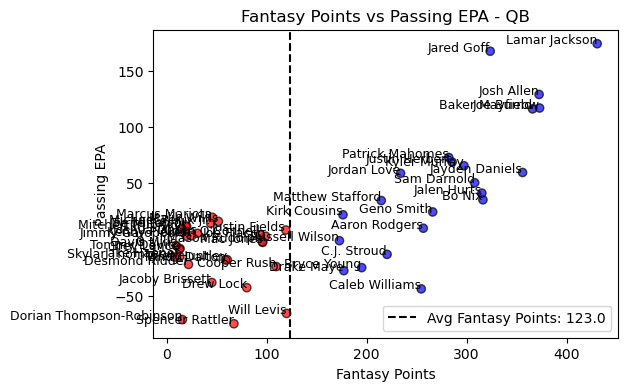

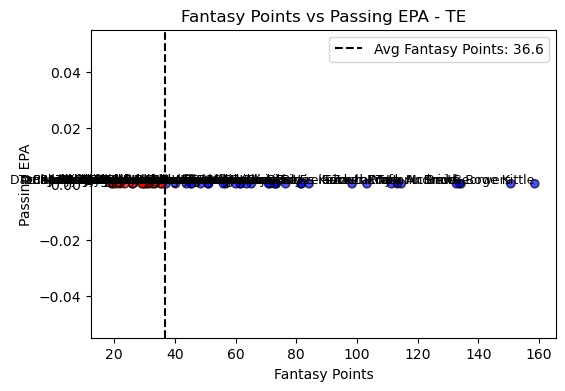

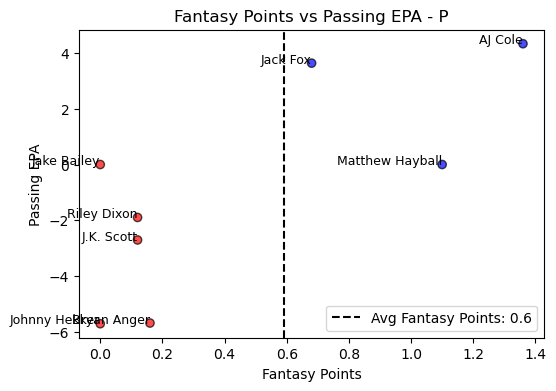

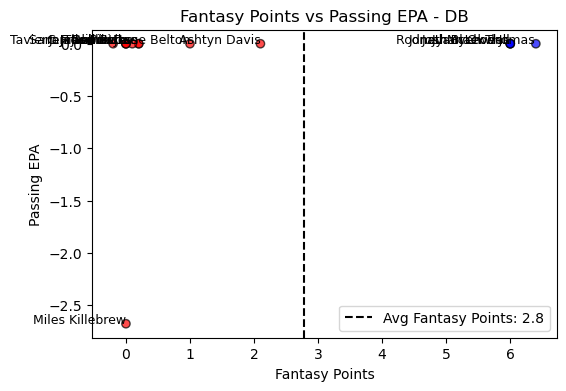

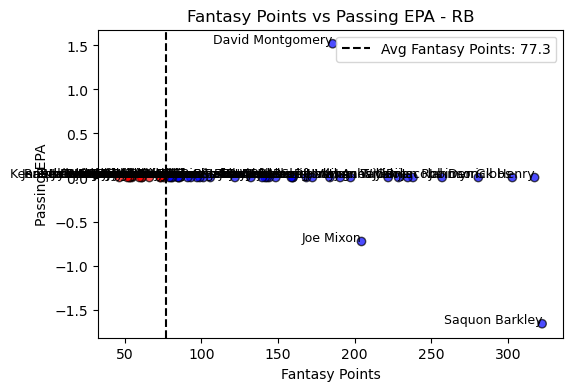

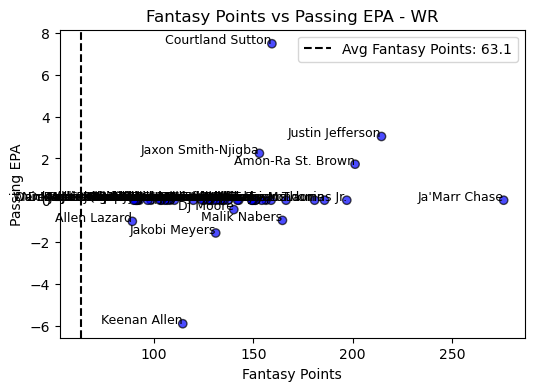

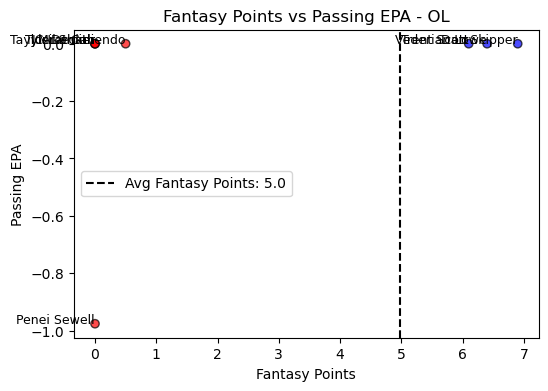

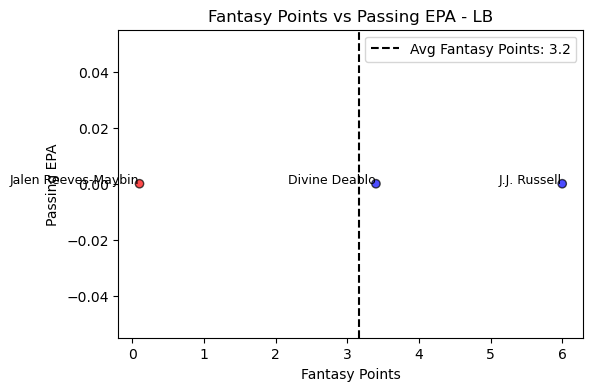

IndexError: single positional indexer is out-of-bounds

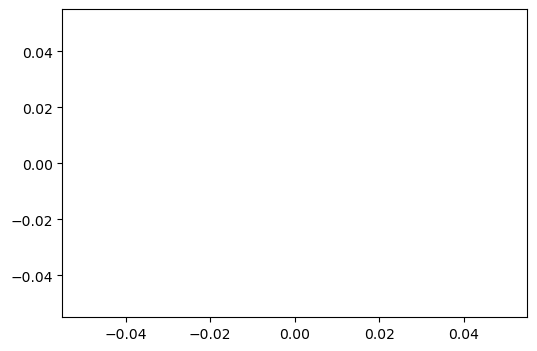

In [146]:
for key, df in d.items():
    df = df.sort_values(by="fantasy_points",ascending=False).head(50)
    colors = df['above_avg_tot'].map({True:"blue",False:"red"})

    plt.figure(figsize=(6,4))
    plt.scatter(df['fantasy_points'], df['passing_epa'], c=colors, alpha=0.7, edgecolors="black")

    for i, player in enumerate(df['player_name']):
        plt.text(df["fantasy_points"].iloc[i], df['passing_epa'].iloc[i],player, fontsize=9,ha="right")
    
    plt.axvline(df['avg_fantasy_points_by_position_tot'].iloc[0], color='black', linestyle="dashed", label=f"Avg Fantasy Points: {df['avg_fantasy_points_by_position_tot'].iloc[0]:.1f}")
    plt.title(f"Fantasy Points vs Passing EPA - {key}")
    plt.xlabel("Fantasy Points")
    plt.ylabel("Passing EPA")
    plt.legend()
    plt.show()

Text(0, 0.5, 'Fantasy Points')

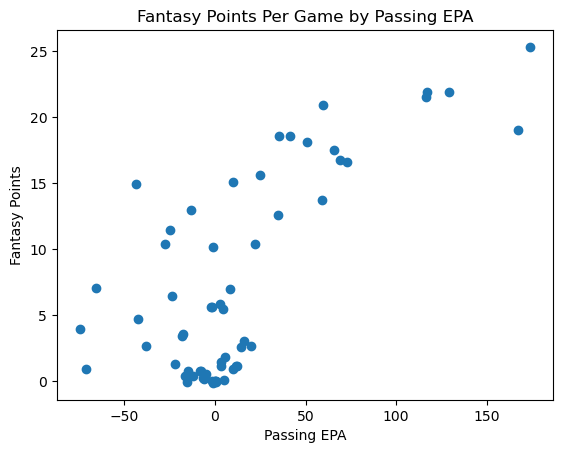

In [142]:
plt.scatter(d['QB']['passing_epa'],d['QB']['fantasy_points_pg'])
plt.title("Fantasy Points Per Game by Passing EPA")
plt.xlabel('Passing EPA')
plt.ylabel('Fantasy Points')

Text(0, 0.5, 'Fantasy Points')

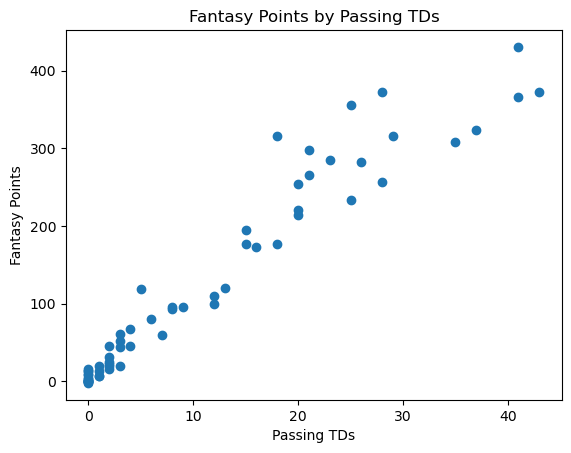

In [12]:
plt.scatter(QB_2024['passing_tds'],QB_2024['fantasy_points'])
plt.title("Fantasy Points by Passing TDs")
plt.xlabel('Passing TDs')
plt.ylabel('Fantasy Points')

### Correlation 

In [20]:
Season_2024.corr()

/var/folders/k5/1qrkb58x6nn6nr4y1p7c9m100000gn/T/ipykernel_60678/3362103822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Season_2024.corr()


,season,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,...,ppr_sh,jersey_number,height,weight,years_exp,week,entry_year,rookie_year,draft_number,age
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
completions,NaN,1.000000,0.998121,0.995905,0.963215,0.917885,0.937991,0.936005,0.890050,0.713023,...,0.389591,-0.210221,0.118619,0.029572,0.153909,-0.027018,-0.153909,-0.154306,-0.244673,0.144096
attempts,NaN,0.998121,1.000000,0.994441,0.956088,0.923704,0.941495,0.940542,0.895276,0.726075,...,0.391285,-0.213013,0.121525,0.030890,0.152182,-0.031119,-0.152182,-0.152587,-0.245906,0.141843
passing_yards,NaN,0.995905,0.994441,1.000000,0.973285,0.915378,0.927102,0.924517,0.888912,0.706913,...,0.392579,-0.208702,0.120470,0.029880,0.154152,-0.021698,-0.154152,-0.154547,-0.241987,0.142108
passing_tds,NaN,0.963215,0.956088,0.973285,1.000000,0.858168,0.868877,0.864082,0.840276,0.651181,...,0.379843,-0.192292,0.111092,0.027094,0.152827,-0.004723,-0.152827,-0.153188,-0.240618,0.139760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
week,NaN,-0.027018,-0.031119,-0.021698,-0.004723,-0.065090,-0.031790,-0.030417,-0.062800,-0.069175,...,0.055376,-0.023225,0.010480,0.044807,0.026311,1.000000,-0.026311,-0.027551,-0.053905,0.003891
entry_year,NaN,-0.153909,-0.152182,-0.154152,-0.152827,-0.147492,-0.122743,-0.127077,-0.144650,-0.113137,...,-0.107743,0.087128,-0.097281,-0.103919,-1.000000,-0.026311,1.000000,0.999351,0.219116,-0.945451
rookie_year,NaN,-0.154306,-0.152587,-0.154547,-0.153188,-0.147885,-0.123142,-0.127472,-0.145046,-0.113480,...,-0.108117,0.085831,-0.099022,-0.107138,-0.999351,-0.027551,0.999351,1.000000,0.219116,-0.944573
draft_number,NaN,-0.244673,-0.245906,-0.241987,-0.240618,-0.218088,-0.236941,-0.243457,-0.204844,-0.166307,...,-0.421158,0.238235,-0.099697,-0.030308,-0.219116,-0.053905,0.219116,0.219116,1.000000,-0.117441


Breaks down strong correlation to fantasy points

/var/folders/k5/1qrkb58x6nn6nr4y1p7c9m100000gn/T/ipykernel_64068/3662122651.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


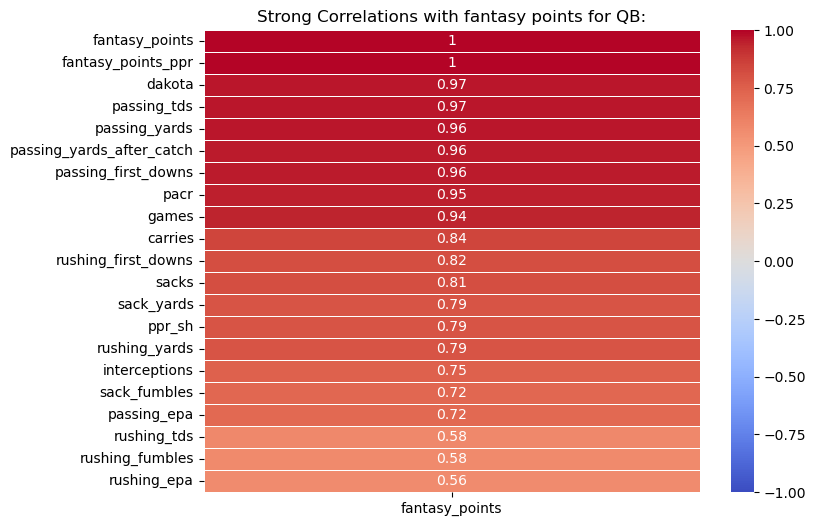

/var/folders/k5/1qrkb58x6nn6nr4y1p7c9m100000gn/T/ipykernel_64068/3662122651.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


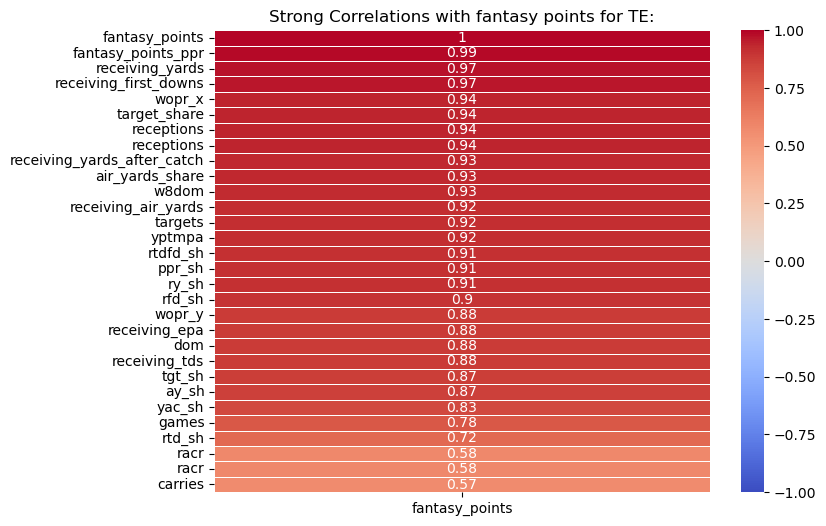

/var/folders/k5/1qrkb58x6nn6nr4y1p7c9m100000gn/T/ipykernel_64068/3662122651.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


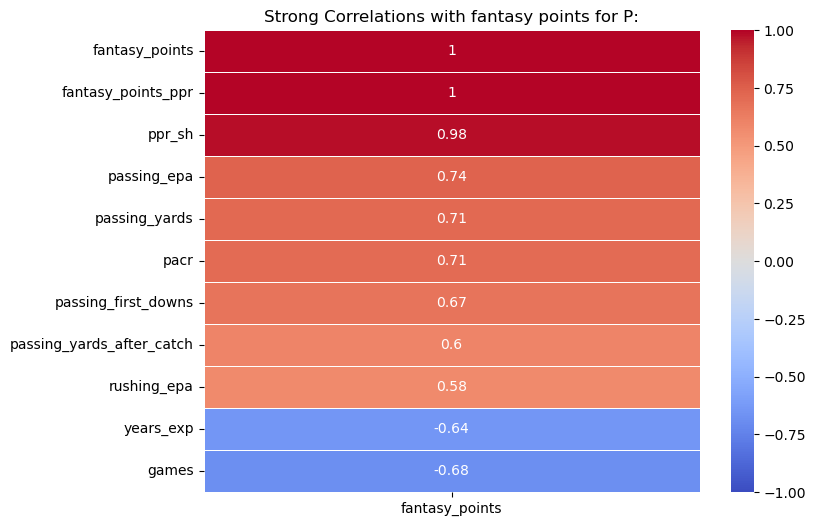

/var/folders/k5/1qrkb58x6nn6nr4y1p7c9m100000gn/T/ipykernel_64068/3662122651.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


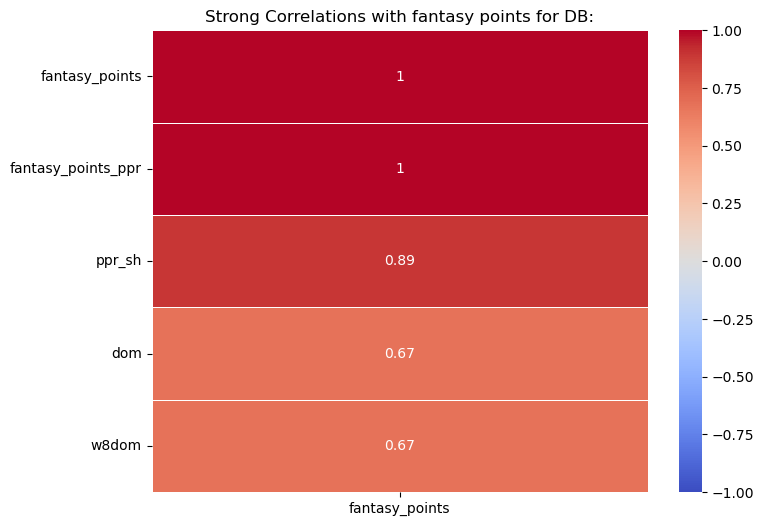

/var/folders/k5/1qrkb58x6nn6nr4y1p7c9m100000gn/T/ipykernel_64068/3662122651.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


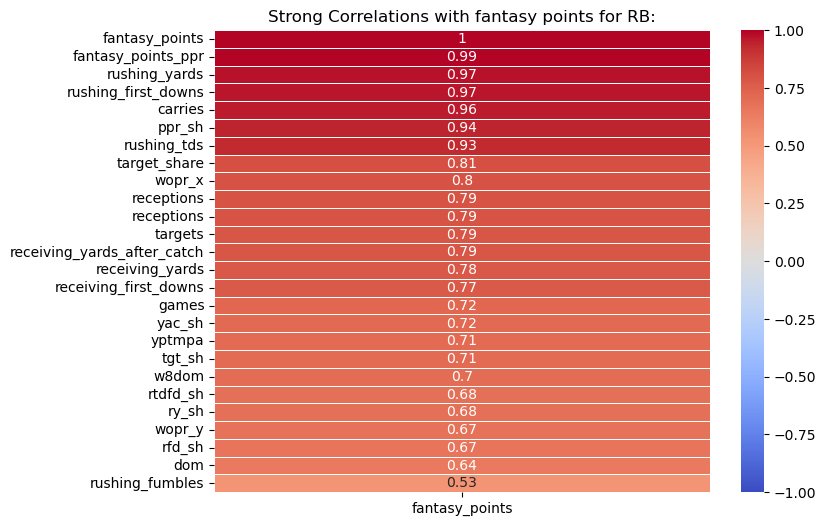

/var/folders/k5/1qrkb58x6nn6nr4y1p7c9m100000gn/T/ipykernel_64068/3662122651.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


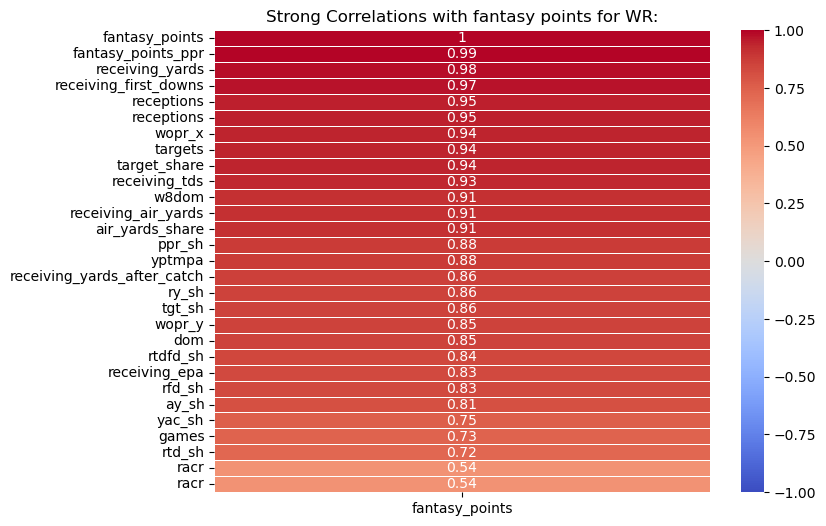

/var/folders/k5/1qrkb58x6nn6nr4y1p7c9m100000gn/T/ipykernel_64068/3662122651.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


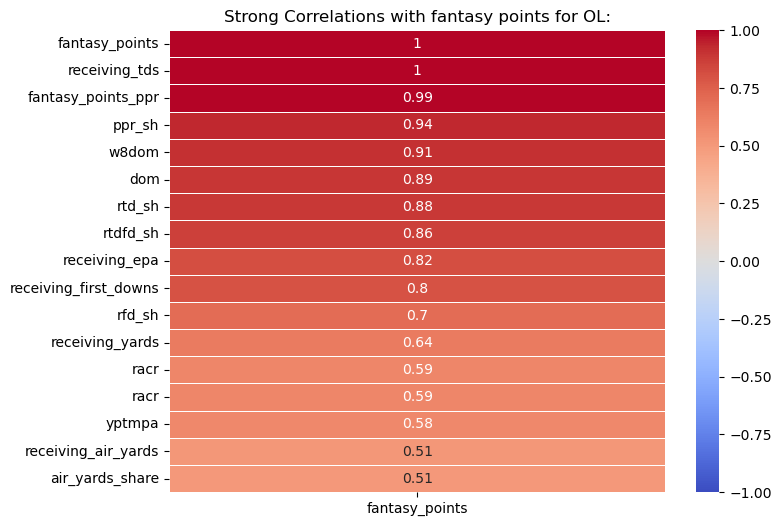

/var/folders/k5/1qrkb58x6nn6nr4y1p7c9m100000gn/T/ipykernel_64068/3662122651.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


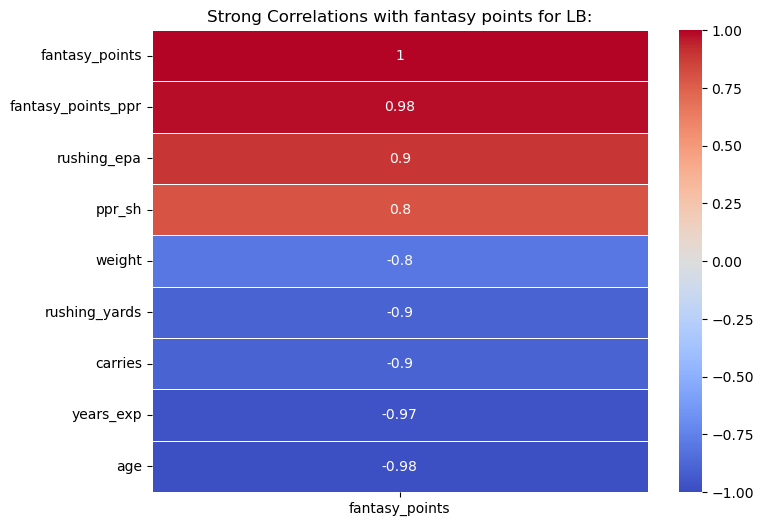

no data


In [109]:
for pos in positions:
    if pos in d and not d[pos].empty:
        df = d[pos].copy()

        correlation_matrix = df.corr()
        
        if 'fantasy_points' in correlation_matrix.columns:
            fantasy_corr = correlation_matrix[['fantasy_points']].dropna()

            strong_corr = fantasy_corr[(fantasy_corr['fantasy_points'].abs() > 0.5)].sort_values(by='fantasy_points',ascending=False)

            if not strong_corr.empty:

                plt.figure(figsize=(8,6))
                sns.heatmap(strong_corr,annot=True,cmap='coolwarm',linewidths=0.5,vmin=-1,vmax=1)

                plt.title(f"Strong Correlations with fantasy points for {pos}:")
                plt.show()
            else:
                print(f"No strong correlations (>|0.5|) for {pos}.")
        else:
            print(f"fantasy points column not found in {pos}")

    else:
        print("no data")

In [ ]:
#creates a list of the highly correlated variables 

strong_correlation_list = {}

for pos in positions:
    if pos in d and not d[pos].empty:
        df = d[pos].copy()

        correlation_matrix = df.corr()

        if 'fantasy_points' in correlation_matrix.columns:
            fantasy_corr = correlation_matrix[['fantasy_points']].dropna()
            strong_corr = fantasy_corr[fantasy_corr['fantasy_points'].abs() >0.5]     

            strong_variables = strong_corr.index.tolist()

            strong_correlation_list[pos] = strong_variables
        else:
            strong_correlation_list[pos] = [] #no data for position
    else:   
        strong_correlation_list[pos] = [] #no data for position

for post, variables in strong_correlation_list.items():
    print(f'{post}')
    print(f'{variables}')                         

In [138]:
matrix = d['WR'].corr()
if 'fantasy_points' in matrix.columns:
    fant_corr = matrix[['fantasy_points']].dropna()
    strong_corr = fant_corr[fant_corr['fantasy_points'].abs() >0.1 ].sort_values(by='fantasy_points',ascending=False)

/var/folders/k5/1qrkb58x6nn6nr4y1p7c9m100000gn/T/ipykernel_64068/3972392062.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = d['WR'].corr()


In [139]:
strong_corr

,fantasy_points
fantasy_points,1.000000
fantasy_points_ppr,0.993585
receiving_yards,0.983123
receiving_first_downs,0.969097
receptions,0.946482
wopr_x,0.943043
targets,0.942670
target_share,0.940303
receiving_tds,0.929941
w8dom,0.912863
